3776


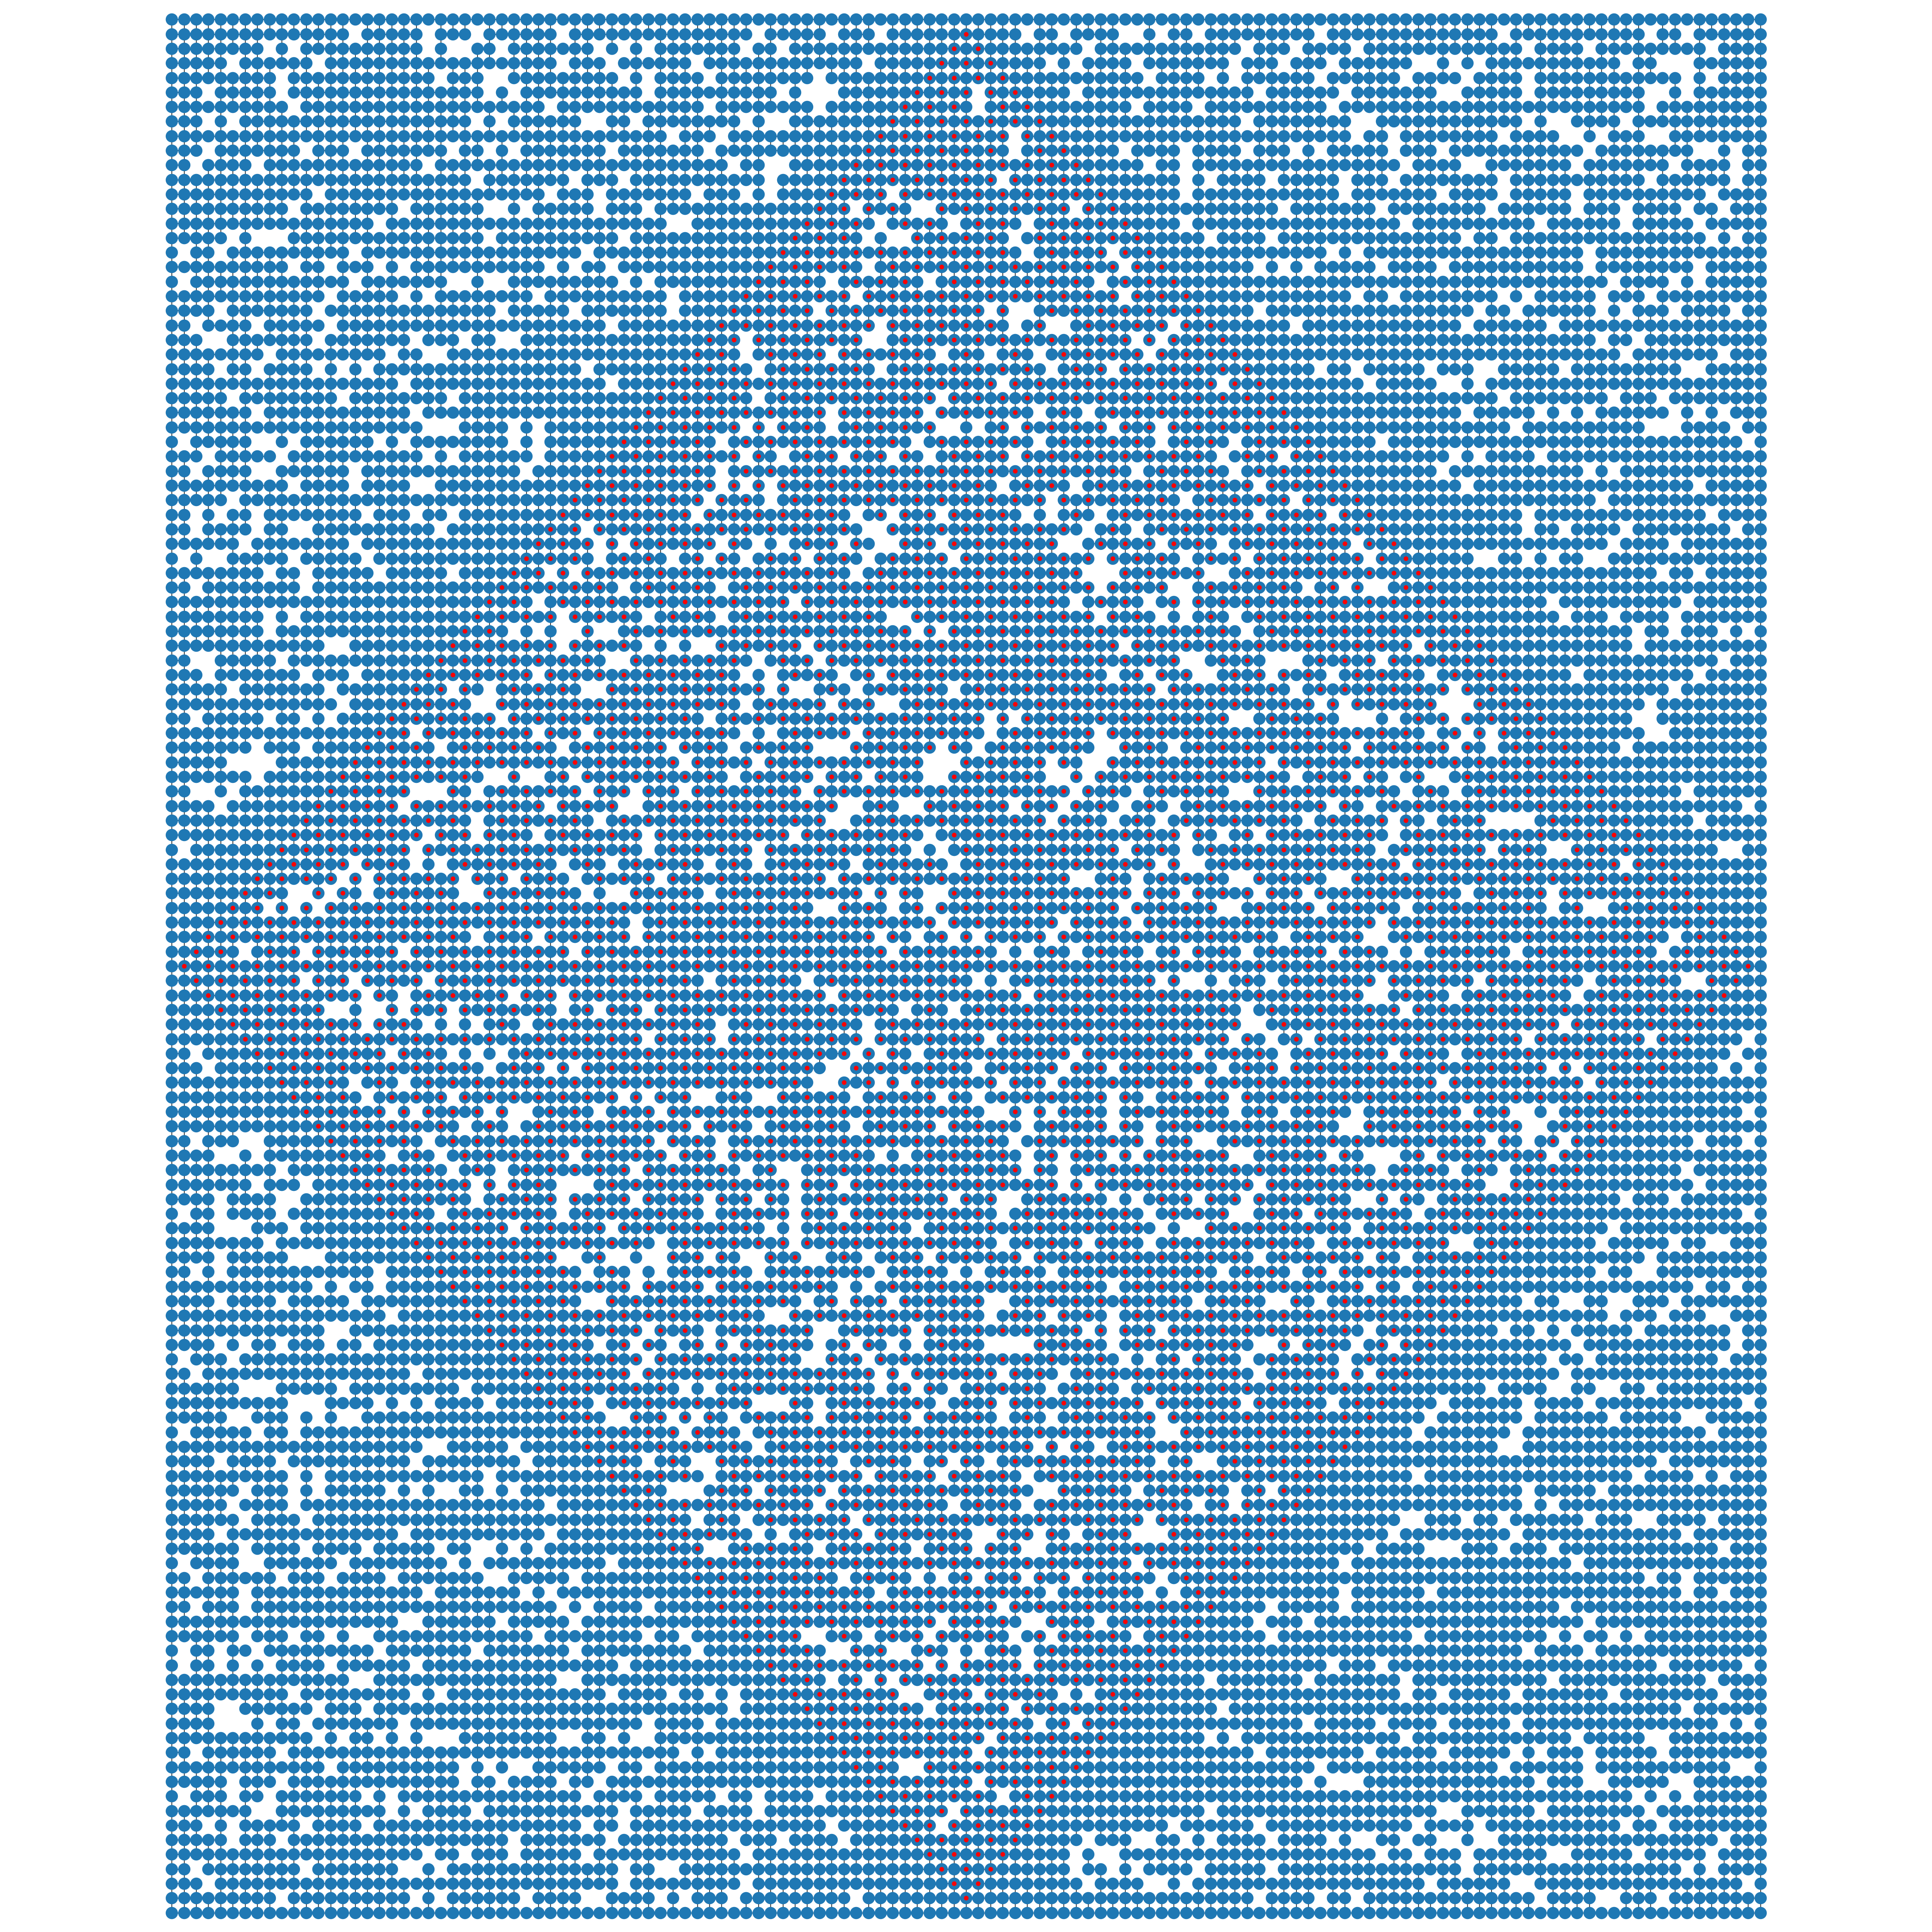

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

with open("input.txt") as f:
    lines = f.readlines()
    
G = nx.Graph()    

input = np.array([list(line.strip()) for line in lines])

for row, column in product(range(input.shape[0]), range(input.shape[1])):
    if input[row, column] == '#':
        continue
    for row_offset, column_offset in ((0, 1), (1, 0), (0, -1), (-1, 0)):
        if row + row_offset < 0 or row + row_offset >= input.shape[0] or column + column_offset < 0 or column + column_offset >= input.shape[1]:
            continue
        
        if input[row + row_offset, column + column_offset] != '#': 
            G.add_edge((row, column), (row + row_offset, column + column_offset))
            
pos = {node: np.array([node[1], node[0]]) for node in G.nodes}
            
startpos = np.where(input == 'S')
startpos= (startpos[0][0], startpos[1][0])

current_nodes = [startpos]

for step in range(64):
    new_nodes = []
    for node in current_nodes:
        for neighbor in G.neighbors(node):
            if neighbor not in new_nodes:
                new_nodes.append(neighbor)
    current_nodes = new_nodes 
    
print(len(current_nodes))
     
plt.figure(figsize=(40, 40))
nx.draw(G, with_labels=False, pos=pos)

for node in current_nodes:
    plt.plot(node[1], node[0], 'ro')

plt.ylim(input.shape[0], -1)
plt.show()
